In [66]:
'''
@brief  Legrest angle recommendataion
@authro Byunghun Hwang <bh.hwang@iae.re.kr>
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CONFIGURATION_FILE_PATH = "./data/train/data_config.csv"
DATASET_PATH = "./data/train/"

# load data configuration file
data_config = pd.read_csv(CONFIGURATION_FILE_PATH, header=0, index_col=0)

fsr_dataframe = {}
seat_dataframe = {}

for idx in data_config.index:
    fsr_filepath = DATASET_PATH+data_config.loc[idx, "fsr_matrix_1d_datafile"] # set FSR matrix data filepath
    seat_filepath = DATASET_PATH+data_config.loc[idx, "seat_datafile"] # set Seat data filepath
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    fsr_dataframe[idx] = pd.read_csv(fsr_filepath, header=0, index_col=False).iloc[:,0:162] # read FSR matrix data file
    seat_dataframe[idx] = pd.read_csv(seat_filepath, header=0, index_col=False) # read Seat data file

    # clear unnecessary columns
    del seat_dataframe[idx]['Measurement time'] # remove unnecessary column
    del fsr_dataframe[idx]['Measurement Time (sec)'] # remove unnecessary column

fsr_dataframe_standard_segment = {}
fsr_dataframe_relax_segment = {}
seat_loadcell_dataframe_standard_segment = {}
seat_loadcell_dataframe_relax_segment = {}

for idx in data_config.index:
    mtime = data_config.loc[idx, ['standard_s_mtime', "standard_e_mtime", "relax_s_mtime", "relax_e_mtime"]]

    # seat loadcell segmentation
    seat_loadcell_dataframe_standard_segment[idx] = seat_dataframe[idx][(seat_dataframe[idx]['mtime']>=mtime.standard_s_mtime) & (seat_dataframe[idx]['mtime']<=mtime.standard_e_mtime)]
    seat_loadcell_dataframe_relax_segment[idx] = seat_dataframe[idx][(seat_dataframe[idx]['mtime']>=mtime.relax_s_mtime) & (seat_dataframe[idx]['mtime']<=mtime.relax_e_mtime)]

    # fsr matrix segmentation
    fsr_dataframe_standard_segment[idx] = fsr_dataframe[idx][(fsr_dataframe[idx]['mtime']>=mtime.standard_s_mtime) & (fsr_dataframe[idx]['mtime']<=mtime.standard_e_mtime)]
    fsr_dataframe_relax_segment[idx] = fsr_dataframe[idx][(fsr_dataframe[idx]['mtime']>=mtime.relax_s_mtime) & (fsr_dataframe[idx]['mtime']<=mtime.relax_e_mtime)]

    print("FSR Segments@Standard size : ", len(fsr_dataframe_standard_segment[idx]), ", FSR Segments@Relax size : ", len(fsr_dataframe_relax_segment[idx]))
    print("Seat Segments@Standard size : ", len(seat_loadcell_dataframe_standard_segment[idx]), ", Seat Segments@Relax size : ", len(seat_loadcell_dataframe_relax_segment[idx]))

1 ) read data files :  ./data/train/20210303T160024-1dm.csv , ./data/train/data_01m.csv
2 ) read data files :  ./data/train/20210310T104529-1dm.csv , ./data/train/data_02m.csv
3 ) read data files :  ./data/train/20210310T110616-1dm.csv , ./data/train/data_03m.csv
4 ) read data files :  ./data/train/20210318T170103-1dm.csv , ./data/train/data_04m.csv
5 ) read data files :  ./data/train/20210310T153307-1dm.csv , ./data/train/data_05m.csv
6 ) read data files :  ./data/train/20210310T154900-1dm.csv , ./data/train/data_06m.csv
7 ) read data files :  ./data/train/20210311T131751-1dm.csv , ./data/train/data_07m.csv
8 ) read data files :  ./data/train/20210311T134516-1dm.csv , ./data/train/data_08m.csv
9 ) read data files :  ./data/train/20210311T150952-1dm.csv , ./data/train/data_09m.csv
10 ) read data files :  ./data/train/20210311T153746-1dm.csv , ./data/train/data_10m.csv
11 ) read data files :  ./data/train/20210311T154809-1dm.csv , ./data/train/data_11m.csv
12 ) read data files :  ./data

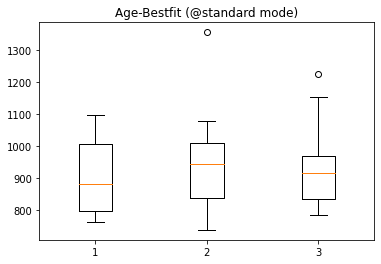

Altman 910 oneway ANOVA : F=0.2, p=0.79791


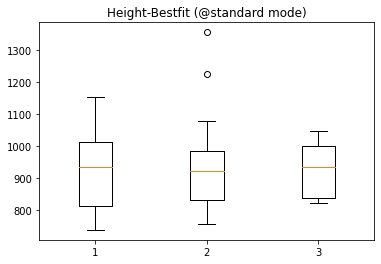

Altman 910 oneway ANOVA : F=0.0, p=0.99597


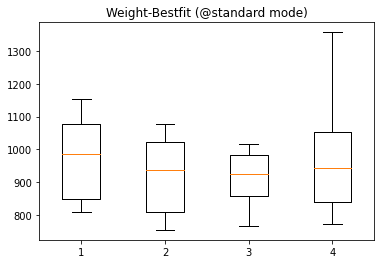

Altman 910 oneway ANOVA : F=0.9, p=0.45636


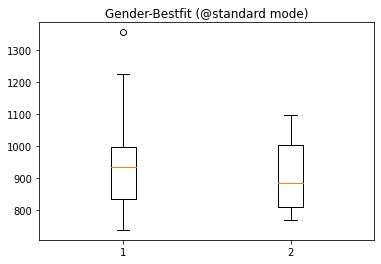

Altman 910 oneway ANOVA : F=0.1, p=0.70968


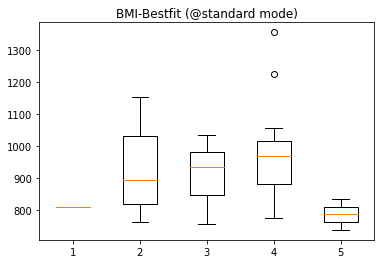

Altman 910 oneway ANOVA : F=1.4, p=0.23895


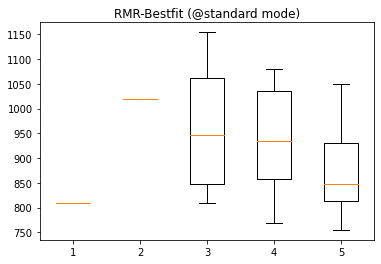

Altman 910 oneway ANOVA : F=1.2, p=0.34120


In [65]:
'''
Box-and-Whisker Plot for analysis of correlation between age and bestfit
'''
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# age bestfit standard

source = data_config.loc[:, ['user_age', 'bestfit_angle_standard']]
age_20s = source.loc[(source['user_age']<30)&(source['user_age']>=20),'bestfit_angle_standard']
age_30s = source.loc[(source['user_age']<40)&(source['user_age']>=30),'bestfit_angle_standard']
age_40s = source.loc[(source['user_age']<50)&(source['user_age']>=40),'bestfit_angle_standard']

plt.figure()
plt.title("Age-Bestfit (@standard mode)")
plt.boxplot([age_20s, age_30s, age_40s])
plt.show()

F_statistic, pVal = stats.f_oneway(age_20s, age_30s, age_40s) #Atman910
print('Altman 910 oneway ANOVA : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

# height bestfit standard
source = data_config.loc[:, ['user_height', 'bestfit_angle_standard']]
height_160 = source.loc[(source['user_height']<170)&(source['user_height']>=160),'bestfit_angle_standard']
height_170 = source.loc[(source['user_height']<180)&(source['user_height']>=170),'bestfit_angle_standard']
height_180 = source.loc[(source['user_height']<190)&(source['user_height']>=180),'bestfit_angle_standard']

plt.figure()
plt.title("Height-Bestfit (@standard mode)")
plt.boxplot([height_160, height_170, height_180])
plt.show()

F_statistic, pVal = stats.f_oneway(height_160, height_170, height_180) #Atman910
print('Altman 910 oneway ANOVA : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))


# weight bestfit standard
source = data_config.loc[:, ['user_weight', 'bestfit_angle_standard']]
weight_50 = source.loc[(source['user_weight']<60)&(source['user_weight']>=50),'bestfit_angle_standard']
weight_60 = source.loc[(source['user_weight']<70)&(source['user_weight']>=60),'bestfit_angle_standard']
weight_70 = source.loc[(source['user_weight']<80)&(source['user_weight']>=70),'bestfit_angle_standard']
weight_80 = source.loc[(source['user_weight']<90)&(source['user_weight']>=80),'bestfit_angle_standard']

plt.figure()
plt.title("Weight-Bestfit (@standard mode)")
plt.boxplot([weight_50, weight_60, weight_70, weight_80])
plt.show()

F_statistic, pVal = stats.f_oneway(weight_50, weight_60, weight_70, weight_80) #Atman910
print('Altman 910 oneway ANOVA : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))


# gender bestfit standard
source = data_config.loc[:, ['user_gender', 'bestfit_angle_standard']]
female = source.loc[(source['user_gender']==0),'bestfit_angle_standard']
male = source.loc[(source['user_gender']==1),'bestfit_angle_standard']

plt.figure()
plt.title("Gender-Bestfit (@standard mode)")
plt.boxplot([male, female])
plt.show()

F_statistic, pVal = stats.f_oneway(male, female) #Atman910
print('Altman 910 oneway ANOVA : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))


# BMI bestfit standard
source = data_config.loc[:, ['user_height','user_weight', 'bestfit_angle_standard']]
bmi = source['user_weight']/(source['user_height']/100*source['user_height']/100)
bmi_source = pd.DataFrame(source)
bmi_source['bmi'] = bmi

group1 = bmi_source.loc[bmi_source['bmi']<18.5,'bestfit_angle_standard']
group2 = bmi_source.loc[(bmi_source['bmi']<22.9)&(bmi_source['bmi']>=18.5),'bestfit_angle_standard']
group3 = bmi_source.loc[(bmi_source['bmi']<24.9)&(bmi_source['bmi']>=22.9),'bestfit_angle_standard']
group4 = bmi_source.loc[(bmi_source['bmi']<29.9)&(bmi_source['bmi']>=24.9),'bestfit_angle_standard']
group5 = bmi_source.loc[(bmi_source['bmi']<34.9)&(bmi_source['bmi']>=29.9),'bestfit_angle_standard']

plt.figure()
plt.title("BMI-Bestfit (@standard mode)")
plt.boxplot([group1, group2, group3, group4, group5])
plt.show()

F_statistic, pVal = stats.f_oneway(group1, group2, group3, group4, group5) #Atman910
print('Altman 910 oneway ANOVA : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))


# RMR bestfit standard
source = data_config.loc[:, ['user_height','user_weight', 'user_age', 'user_gender', 'bestfit_angle_standard']]
rmr = 66.47+(13.75*source['user_weight'])+(5*source['user_height'])-(6.76*source['user_age'])
rmr_source = pd.DataFrame(source)
rmr_source['rmr'] = rmr

# group1 = rmr_source.loc[rmr_source['rmr']<1200,'bestfit_angle_standard']
group2 = rmr_source.loc[(rmr_source['rmr']<1300)&(rmr_source['rmr']>=1200),'bestfit_angle_standard']
group3 = rmr_source.loc[(rmr_source['rmr']<1400)&(rmr_source['rmr']>=1300),'bestfit_angle_standard']
group4 = rmr_source.loc[(rmr_source['rmr']<1500)&(rmr_source['rmr']>=1400),'bestfit_angle_standard']
group5 = rmr_source.loc[(rmr_source['rmr']<1600)&(rmr_source['rmr']>=1500),'bestfit_angle_standard']
group6 = rmr_source.loc[(rmr_source['rmr']<1700)&(rmr_source['rmr']>=1600),'bestfit_angle_standard']

plt.figure()
plt.title("RMR-Bestfit (@standard mode)")
plt.boxplot([group2, group3, group4, group5, group6])
plt.show()

F_statistic, pVal = stats.f_oneway(group2, group3, group4, group5, group6) #Atman910
print('Altman 910 oneway ANOVA : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))


               df         sum_sq       mean_sq         F    PR(>F)
C(user_age)  18.0  254555.742177  14141.985676  0.735607  0.748752
user_height   1.0    4993.625488   4993.625488  0.259748  0.614287
user_weight   1.0    2123.609156   2123.609156  0.110461  0.742095
Residual     28.0  538297.798689  19224.921382       NaN       NaN
                              OLS Regression Results                              
Dep. Variable:     bestfit_angle_standard   R-squared:                       0.327
Model:                                OLS   Adj. R-squared:                 -0.154
Method:                     Least Squares   F-statistic:                    0.6806
Date:                    Wed, 28 Apr 2021   Prob (F-statistic):              0.812
Time:                            00:00:55   Log-Likelihood:                -297.48
No. Observations:                      49   AIC:                             637.0
Df Residuals:                          28   BIC:                             676.7
D

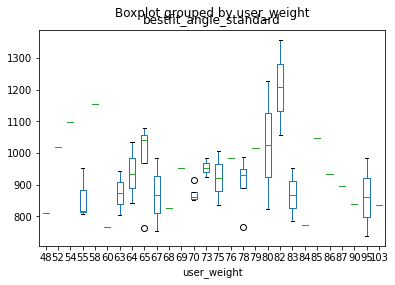

In [80]:
'''
using statmodels
'''
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

source = data_config.loc[:, ['user_height', 'user_weight', 'user_age', 'bestfit_angle_standard']]
source.boxplot(column = 'bestfit_angle_standard', by='user_weight' , grid=False)

formula = 'bestfit_angle_standard ~ user_height + user_weight + C(user_age)'
lm = ols(formula, data=source).fit()
print(anova_lm(lm))
print(lm.summary())

# results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
# print(results.summary())

In [ ]:
'''
n-way anova
'''


In [ ]:
'''
correlation analysis
'''



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
print(regr.predict([[0, 0, 0, 0]]))